#### The main objective of this notebook is to perform a detailed EDA and have some insights about data for Auser Aquifier. The EDA of the other data is covered in seperate Notebooks.####

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## For plotting data
from IPython.display import Image
import os

## Objective

The main objective is to give some insights and interpretations and also ideas on data realated to Aquifer_Auser. It is fine to proceed this way since the differnet sources are not related.**

In [ ]:
# Loading the data
df = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Auser.csv')

Let us have a first look at this data.

In [ ]:
df.head()

Ok, a quite number of features we do not really understand. This is why we need to refer to data description attached to the files.

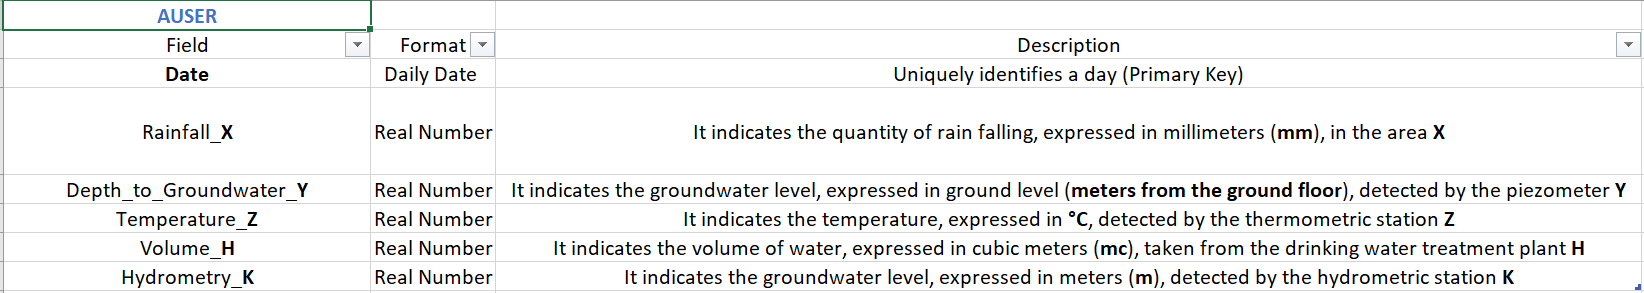

The table has mainly data related to 5 classes of parameters: Rainfall, Dapth to Groundwater, Temperature, Volume, Hydrometry. Among these we would like to determine Depth to Groundwater (the target feature).

In a first step, we will focus on data about rainfall. This data is about the rain falling in different locations in Italy. It is always a good habit to look for these locations on map. I tried my best to show all these on a single picture.


In [ ]:
Image("/kaggle/input/images/Capture.PNG")

In [ ]:
df.columns

## Rainfall data

Missing data is my ultimate nightmare. I see that for some features there is a big number of missing values. Instead of deaming with them in a batch, I will do it for each class of parameters: Rainfall, Depth, etc. Let us isolate these features in a seperate dataframe but before I need to transform parse dates.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [ ]:
rain_feat = [col for col in df.columns if col.startswith("Rain")]
rain_feat.append("Day")
rain_feat.append("Month")
rain_feat.append("Year")
rain_feat.append("Date")
df_rain = df[rain_feat]

In [ ]:
df_rain.head()

Let us explore now the missing values

In [ ]:
df_rain.isnull().sum() / len(df_rain)

We can strangely that the first two features and the last four ones have exactly the same ratio of missing data. We need to check if this happend on the same dates. Let us make use of a plot! (do not forget to add matplotlib package)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
rain_feat_only = [col for col in df.columns if col.startswith("Rain")]
for col in rain_feat_only:
    plt.figure(figsize=(30,5), dpi=300)
    sns.lineplot(df_rain["Date"], df_rain[col])
    plt.title(col)

Here are my conclusions about this analysis for missing data. Normally the data is gathered for a period form: **1998** to **2020** but in for rainfull data, you might notice that data starts from 2006.

In [ ]:
df.head(1)

In [ ]:
df.tail(1)

Let us confirm this by looking deeper to this dataframe. We will groupe nan values by year and see the resutls. Before we select only rows for which there are nan values.

In [ ]:
null = []
for col in rain_feat_only:
    df_null = df_rain[df_rain[col].isna()]
    null.append(df_null.groupby('Year').count()["Date"].to_dict())
    

In [ ]:
#Convert it to a df
null_df = pd.DataFrame(null, index=rain_feat_only)

In [ ]:
# We will need to reindex it
null_df = null_df.reindex(sorted(null_df.columns), axis=1)

In [ ]:
null_df

Two conclusions for this section:

* Raifall data for the period starting from 1998 to 2005 is not available for all the regions. This could be maybe explained by the fact that the meteo stations were built before 2005.

* There are some missing values for 2009 and 2012 for the two regions "Piaggione" and "Monte_Serra" respectively. We might notice that for Piaggione, the measurements started in 2010

I will add also our **TO DO LIST** or our list of hints. 

* Consider only data from 2010.
* Look for a way to replace missing data in 2012. Hints: seasonality or proximity. (If you refer to the map above, Monte Serra is clode to Orentano or Pontetetto).
* Do not forget to add an additional feature to flag that rainfall in Monte_Serra is missing.

## Temperature data

Now that we are done with rainfall data, let us move to tempretaure data and make some exploration.

In [ ]:
temp_feat = [col for col in df.columns if col.startswith("Temp")]
temp_feat.append("Day")
temp_feat.append("Month")
temp_feat.append("Year")
temp_feat.append("Date")
df_temp = df[temp_feat]

In [ ]:
df_temp.head()

Any missing values? (hope no!!)

In [ ]:
df_temp.isnull().sum() / len(df_temp)

Good news, no missing data (but outliers are looking to us!!).Let plot these temperature data.

In [ ]:
temp_feat_only = [col for col in df.columns if col.startswith("Temp")]
for col in temp_feat_only:
    plt.figure(figsize=(30,5), dpi=300)
    sns.lineplot(df_temp["Date"], df_temp[col])
    plt.title(col)

Data show good seasonality which expected. It is true that we did not find missing values and data does not represent some evident outliers bu we need to notice that for the third graph it seems that a number of missing values were replaced by zeros (which is not good for our model :D).

I will add also our **TO DO LIST** or our list of hints. 

* Consider only data from 2010 (since we will do the same thing with rainfall).
* Look for a way to replace missing data for Moriano, Make use of seasonality.

## Depth to groundwater

Now we come to our target variables. Let so do the same analysis before moving to some more avanced stuff.

In [ ]:
depth_feat = [col for col in df.columns if col.startswith("Depth")]
depth_feat.append("Day")
depth_feat.append("Month")
depth_feat.append("Year")
depth_feat.append("Date")
df_depth = df[depth_feat]

In [ ]:
df_depth.head()

It seems that also for the target variable there are some missing values (I hope that they are in the period before 2010)

How much missing values?

In [ ]:
df_depth.isnull().sum() / len(df_depth)

Approximatly half of the records. This number is high but keep in mind that there could not be very much variability in this data (If we substract rainfall).

In [ ]:
depth_feat_only = [col for col in df.columns if col.startswith("Depth")]
for col in depth_feat_only:
    plt.figure(figsize=(30,5), dpi=300)
    sns.lineplot(df_depth["Date"], df_depth[col])
    plt.title(col)

We notice some good seasonality of the depth (which is expected if we take in consideration rainfall and consumption). We need also to explain these peaks in the data as on the second or the forst graph.

## In the next notebook:

I will do some feature engineering to come up with additional features and also some feature selection to select the most convenient ones. See you in the next notebook.